# **Bike Sharing (Capital Bikeshare)**

[Sumber data Bike Sharing](https://capitalbikeshare.com/system-data) 

## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## Business Problem Understanding

### Context

*Capital Bikesharing* adalah sebuah jaringan layanan berbagi sepeda publik yang ada di beberapa kota di Amerika Serikat. Sistem ini memungkinkan pengguna untuk meminjam sepeda dari lokasi tertentu dan mengembalikan sepeda ke lokasi lain setelah mereka selesai menggunakannya. Capital Bikeshare biasanya menggunakan stasiun sepeda dan teknologi pemantauan untuk memastikan bahwa sepeda dapat dipinjam dan dikembalikan dengan mudah.

*Capital Bikeshare* dibuat untuk menawarkan alternatif transportasi yang lebih ramah lingkungan dan efisien bagi warga kota dan turis. Sistem ini juga menyediakan opsi yang menyenangkan dan sehat bagi para penggunanya. Capital Bikeshare umumnya tersedia 24 jam sehari, 7 hari seminggu, dan memerlukan biaya sewa yang rendah.

Project ini menggunakan data kondisi cuaca, musim, tanggal, jam, dan jumlah penyewaan sepeda. Analisis data ini memungkinkan untuk mengkaji hubungan antar fitur dan menemukan metode untuk memprediksi jumlah sepeda yang diperlukan pada kondisi tertentu.

### Problem Statement

Dataset yang digunakan menunjukkan adanya tantangan bagi perusahaan penyedia layanan Bike sharing yaitu bagaimana menentukan jumlah unit sepeda yang perlu disiapkan pada waktu tertentu kedepannya. Ini sangat penting untuk memastikan bahwa pelanggan memiliki akses ke sepeda yang mereka butuhkan di kemudian hari.

### Goals

Untuk mengatasi masalah tersebut, dibutuhkan sebuah model ataupun alat bantu yang dapat memperkirakan jumlah penyewaan sepeda pada kondisi dan waktu tertentu, sehingga penyedia layanan Bike sharing dapat menentukan jumlah unit sepeda yang harus disiapkan di kemudian hari.

### Analytic Approach

Untuk mencapai tujuan yang telah dijabarkan sebelumnya, perlu analisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu kondisi dengan yang lainnya. Serta bagaimana tiap fitur tersebut mempengaruhi jumlah unit sepeda yang perlu tersedia di kemudian hari.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi dalam menentukan jumlah unit sepeda yang perlu disediakan oleh Capital Bikeshare, yang mana akan berguna untuk menjaga efisiensi *operational cost*.

### Metric Evaluation

Untuk mengevaluasi kinerja model, tiga metrik yaitu MAE, MAPE, dan RMSE akan digunakan. MAE, MAPE, dan RMSE adalah tiga metrik yang digunakan untuk mengevaluasi kinerja suatu model pembelajaran mesin. Nilai yang semakin dekat dengan nol yang dihasilkan dari MAE, MAPE, dan RMSE menunjukkan bahwa model semakin akurat dalam memprediksi total penyewaan, berdasarkan batasan fitur yang digunakan.

MAE (Mean Absolute Error) adalah rata-rata dari perbedaan absolut antara hasil aktual dan hasil prediksi. Ini adalah metrik yang sederhana dan menunjukkan seberapa besar kesalahan rata-rata yang dibuat oleh model.

MAPE (Mean Absolute Percentage Error) adalah rata-rata dari presentase error yang dihasilkan oleh model. Ini mengukur kinerja model dalam hal error relatif.

RMSE (Root Mean Squared Error) adalah akar dari rata-rata kuadrat perbedaan antara hasil aktual dan hasil prediksi. Ini adalah metrik yang memperhitungkan tingkat kesalahan yang lebih besar dan memiliki bobot yang lebih besar pada error yang lebih besar.

## Data Understanding


- Dataset merupakan data peminjaman sepeda di sistem ***Capital Bikeshare*** dalam rentang tahun 2011-2012.
- Setiap baris data merepresentasikan informasi terkait waktu peminjaman, cuaca, dan musim yang sesuai.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity (the values are divided to 100)|
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | 0: Not holiday<br> 1: Holiday |
| season | Integer | 1: Winter<br> 2: Spring<br> 3: Summer<br> 4: Fall |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Normalized temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered users|

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


### EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


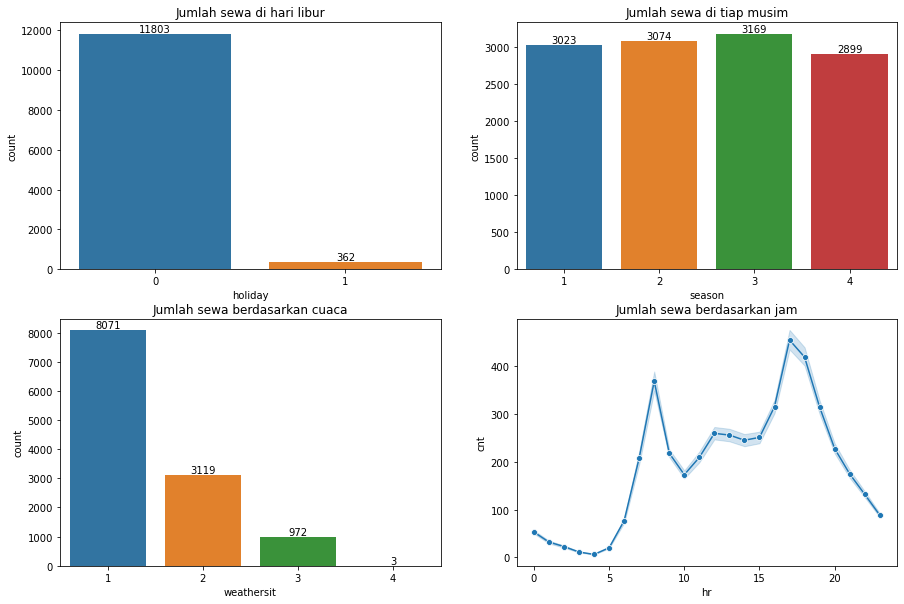

In [4]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
ax = sns.countplot(df['holiday'])
ax.bar_label(ax.containers[0])
plt.title('Jumlah sewa di hari libur', size = 12)

plt.subplot(2,2,2)
ax = sns.countplot(df['season'])
ax.bar_label(ax.containers[0])
plt.title('Jumlah sewa di tiap musim', size = 12)

plt.subplot(2,2,3)
ax = sns.countplot(df['weathersit'])
ax.bar_label(ax.containers[0])
plt.title('Jumlah sewa berdasarkan cuaca', size = 12)

plt.subplot(2,2,4)
sns.lineplot(data=df, x='hr', y='cnt', marker='o')
plt.title('Jumlah sewa berdasarkan jam', size = 12)

plt.show()

Dari 12165 data yang tersedia, sebanyak 11803 data diperoleh pada hari kerja dan 362 data pada hari libur. Season fall menunjukkan tingkat persewaan tertinggi, diikuti oleh summer, spring, dan winter. Sepeda sering disewa saat cuaca cerah hingga berawan, namun sangat sedikit disewa saat cuaca buruk seperti hujan deras, bersalju, badai, dan berkabut. Jam efektif persewaan adalah antara jam 6 hingga 23, dan sering terjadi pada pukul 8, 12, 16, 17, 18, dan 19.

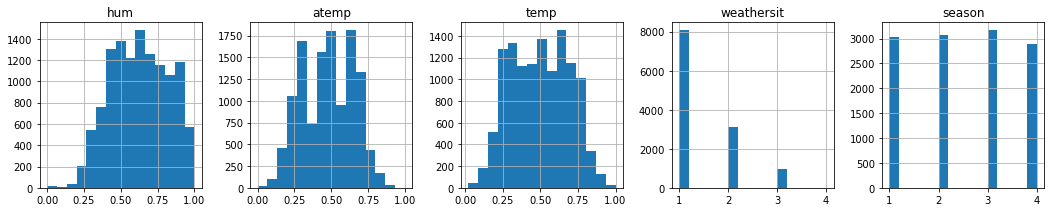

In [5]:
# Histogram data numeric

numerical = ['hum', 'atemp', 'temp', 'weathersit', 'season']
df[numerical].hist(bins=15, figsize=(18, 7), layout=(2, 5));

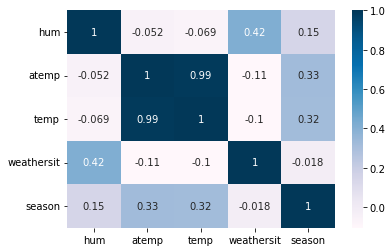

In [6]:
sns.heatmap(df[numerical].corr(), annot=True, cmap='PuBu')
plt.show()

In [7]:
(df['temp']-df['atemp']).mean()

0.0211887217427046

Fitur temp dan atemp memiliki hubungan yang sangat erat. Kedua fitur ini mewakili suhu pada waktu yang sama, sehingga hanya perlu menggunakan salah satu saja. Fitur Humidity juga memiliki korelasi yang cukup baik dengan situasi cuaca.

## Data Preprocessing

Dalam tahap preprocessing data, dilakukan pembersihan data dan dataset yang bersih akan diteruskan untuk analisis selanjutnya. Langkah-langkah yang akan dilakukan dalam tahap ini yaitu: 

   1. menghapus data duplikat
   2. memperbaiki tipe data yang salah 
   3. membuang fitur yang tidak relevan
   4. menambahkan fitur baru yang dianggap penting 
   5. mengatasi nilai yang hilang dengan cara yang sesuai 
   6. mengatasi outlier. 
    
Proses preprocessing dan feature engineering akan menggunakan duplikat dari dataframe yang digunakan sebelumnya.

In [8]:
# Membuat duplikasi dataframe
dfModel = df.copy()

In [9]:
# Ekstrasi fitur dteday untuk mendapatkan bulan, tahun, dan hari
month=[]
year=[]
dayname=[]
dfModel['month'] = pd.to_datetime(dfModel['dteday']).dt.month
dfModel['year'] = pd.to_datetime(dfModel['dteday']).dt.year
dfModel['dayname'] = pd.to_datetime(dfModel['dteday']).dt.day_of_week

In [10]:
# Checking detail setiap fitur
listItem = []

for col in dfModel.columns:
    listItem.append([
        col, 
        dfModel[col].dtype, 
        dfModel[col].isna().sum(), 
        round((dfModel[col].isna().sum()/len(dfModel[col]))*100, 2),
        dfModel[col].nunique(), 
        list(dfModel[col].drop_duplicates().sample(2).values)
    ]);

dfModelDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfModelDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,object,0,0.0,731,"[2012-05-12, 2012-03-29]"
1,hum,float64,0,0.0,89,"[0.67, 0.88]"
2,weathersit,int64,0,0.0,4,"[3, 4]"
3,holiday,int64,0,0.0,2,"[1, 0]"
4,season,int64,0,0.0,4,"[2, 4]"
5,atemp,float64,0,0.0,65,"[0.1515, 0.5606]"
6,temp,float64,0,0.0,50,"[0.32, 0.9]"
7,hr,int64,0,0.0,24,"[12, 5]"
8,casual,int64,0,0.0,305,"[107, 152]"
9,registered,int64,0,0.0,742,"[312, 355]"


In [11]:
dfModel
dfModel.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt,month,year,dayname
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250,12,2011,4
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18,6,2012,6
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107,6,2011,2
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145,3,2012,5
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857,7,2012,1


### Data Duplicate

In [12]:
# Cek data duplikat
dfModel.duplicated().sum()

0

### Feature Dropped

Perlu mempertimbangkan hal-hal tertentu sebelum menghapus kolom atau fitur. Berikut adalah fitur yang akan dihapus beserta alasannya:

   1. Melakukan drop pada fitur 'casual' dan 'registered' karena fokus pada total seluruh persewaan.
   2. Drop fitur 'atemp' karena sudah ada fitur 'temp' dengan korelasi yang tinggi dalam merepresentasikan temperatur.
   3. Drop fitur 'dteday' karena sudah dibuat fitur month, year, dan dayname dari fitur tersebut.

In [13]:
dfModel.drop(['casual', 'registered', 'atemp', 'dteday'], axis=1, inplace=True)

### Data Type dan Rename Columns

In [14]:
dfModel = dfModel.astype({"weathersit":'category', "season":'category', "holiday":'category'})
dfModel.rename({
    'hum' : 'Humidity',
    'weathersit' : 'Weather',
    'season' : 'Season',
    'temp' : 'Temperature',
    'hr' : 'Hour',
    'cnt' : 'Count',
    'month' : 'Month',
    'year' : 'Year',
    'dayname' : 'Day Name',
    'holiday' : 'Holiday'
} , inplace = True , axis = 1)

In [15]:
dfModel

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
4,0.55,1,0,3,0.76,18,857,7,2012,1
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.24,7,257,1,2012,2
12161,0.62,1,0,3,0.78,0,102,7,2012,4
12162,0.60,2,1,1,0.24,5,6,2,2012,0
12163,0.77,2,0,2,0.42,2,69,3,2012,5


In [16]:
# Cek deskriptif statistik fitur 
num_features = [feature for feature in dfModel.columns if ((dfModel[feature].dtypes != 'object'))]
dfModel[num_features].describe()

,Humidity,Temperature,Hour,Count,Month,Year,Day Name
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.498185,11.519770,189.271023,6.510974,2011.501932,3.005261
std,0.192102,0.192492,6.931872,181.223903,3.433995,0.500017,1.992993
min,0.000000,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.470000,0.340000,6.000000,40.000000,4.000000,2011.000000,1.000000
50%,0.620000,0.500000,12.000000,142.000000,7.000000,2012.000000,3.000000
75%,0.780000,0.660000,18.000000,282.000000,9.000000,2012.000000,5.000000
max,1.000000,1.000000,23.000000,970.000000,12.000000,2012.000000,6.000000


### Correlation Matrix

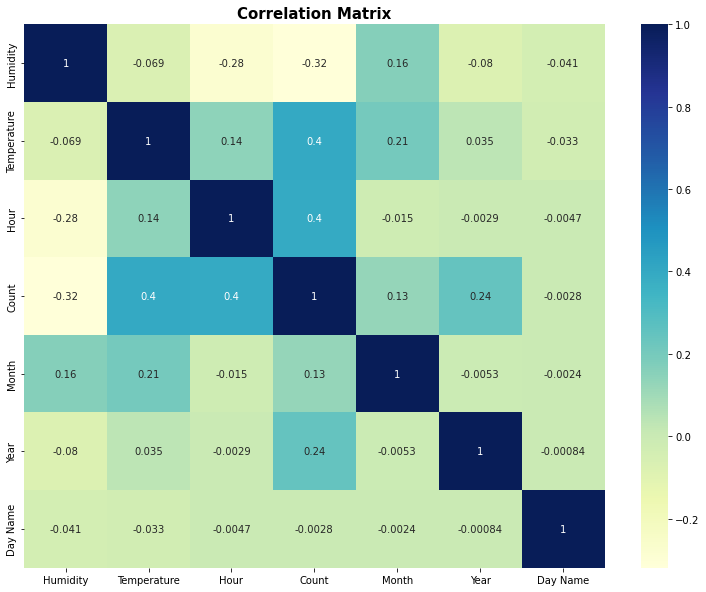

In [17]:
plt.figure(figsize=(13, 10))
sns.heatmap(dfModel[num_features].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix', size=15, weight='bold');
plt.show()

Analisis matriks korelasi menunjukkan bahwa tidak ada fitur yang memiliki hubungan kuat dengan fitur Count. Fitur 'Temperature' dan 'Hour' memiliki korelasi positif paling tinggi, yang berarti semakin tinggi suhu dan waktu, maka semakin banyak juga pemesanan.

Setelah itu, akan dilakukan pemeriksaan distribusi data dan keberadaan outlier pada setiap fitur numerik. Jika memiliki asimetri yang tinggi, salah satu cara untuk memperbaikinya adalah melakukan modifikasi pada masing-masing fitur.

### Check Outliers

Keberadaan banyak nilai outliers pada data pasti akan mempengaruhi hasil analisis dan pemodelan yang dilakukan. Sebelum memutuskan perlakuan yang sesuai untuk data, terdapat beberapa hal yang harus dipertimbangkan, salah satunya adalah dengan mempertimbangkan pengetahuan domain pengetahuan terkait.

<AxesSubplot:>

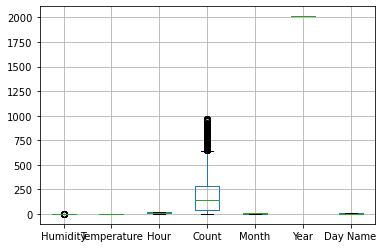

In [18]:
# Plot boxplot untuk mengecek outliers
dfModel.boxplot()

In [19]:
# fungsi untuk mengecek outliers
def cek_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    limit = iqr * 1.5
    print(f'IQR: {iqr}')
    
    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [20]:
cek_outliers(dfModel['Temperature'])

IQR: 0.32
limit_bawah: -0.13999999999999996
limit_atas: 1.1400000000000001


In [21]:
cek_outliers(dfModel['Humidity'])

IQR: 0.31000000000000005
limit_bawah: 0.004999999999999893
limit_atas: 1.245


In [22]:
cek_outliers(dfModel['Count'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


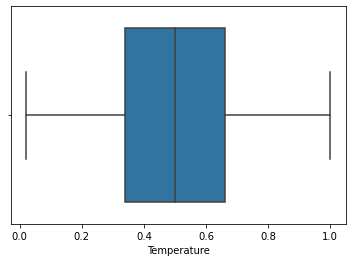

In [23]:
sns.boxplot(dfModel['Temperature'])
plt.show()

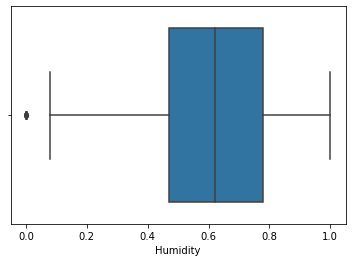

In [24]:
sns.boxplot(dfModel['Humidity'])
plt.show()

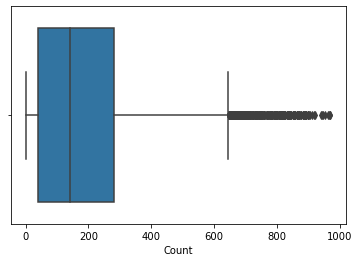

In [25]:
sns.boxplot(dfModel['Count'])
plt.show()

Teridentifikasi adanya data yang terdapat nilai ekstrim pada fitur kelembapan (Humidity) dan hitungan (Count). Agar permasalahan ini dapat diselesaikan, data yang memiliki nilai ekstrim akan dihilangkan. Selanjutnya, prediksi akan dilakukan hanya pada kisaran data yang telah dibersihkan untuk menghindari adanya hasil prediksi yang bias.

### Humidity (Feature Engineering)

In [26]:
# cek deskriptif humidity
dfModel['Humidity'].describe()

count    12165.000000
mean         0.625451
std          0.192102
min          0.000000
25%          0.470000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

In [27]:
# Menghitung jumlah baris pada DataFrame df_model yang memiliki nilai 'Humidity' di atas 1.245 atau di bawah 0.004999999999999893
dfModel[(dfModel['Humidity'] > 1.245) | (dfModel['Humidity'] < 0.004999999999999893)].count()['Humidity']

14

In [28]:
# Melakukan filtering pada data
dfModel = dfModel[(dfModel['Humidity'] <= 1.245) & (dfModel['Humidity'] >= 0.004999999999999893)]

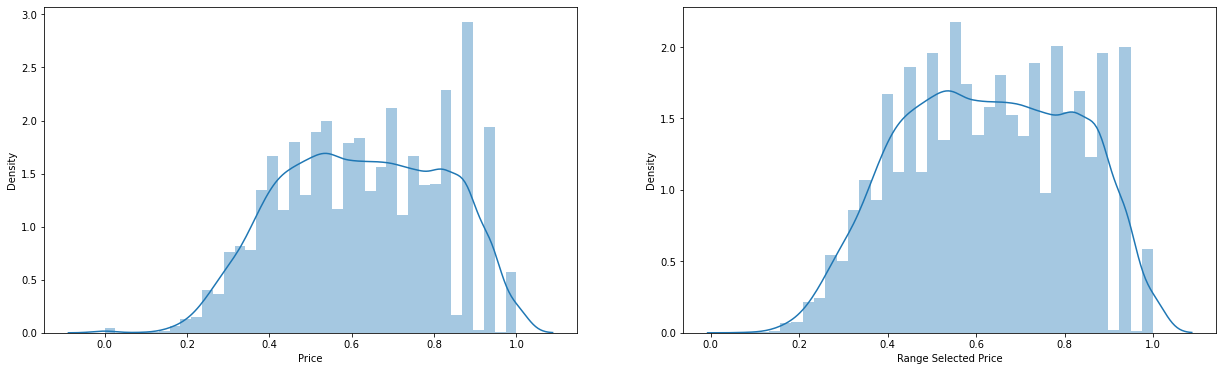

In [29]:
# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(dfModel['Humidity'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price');

In [30]:
# Cek deskriptif statistik kolom 'Humidity' setelah filtering
dfModel['Humidity'].describe()

count    12151.000000
mean         0.626172
std          0.191036
min          0.080000
25%          0.480000
50%          0.620000
75%          0.780000
max          1.000000
Name: Humidity, dtype: float64

### Count (Feature Engineering)

In [31]:
# cek deskriptif humidity
dfModel['Count'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: Count, dtype: float64

In [32]:
# Menghitung jumlah baris pada DataFrame df_model yang memiliki nilai 'Count' di atas 645 atau di bawah -323
dfModel[(dfModel['Count'] > 645) | (dfModel['Count'] < -323)].count()['Count']

338

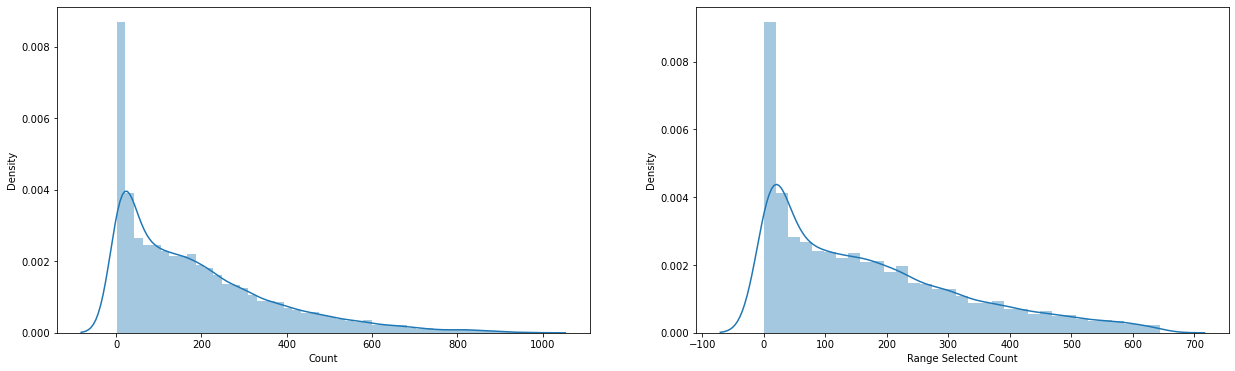

In [33]:
# Melakukan filtering pada data
dfModel = dfModel[(dfModel['Count'] <= 645.0) & (dfModel['Count'] >= -323.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(dfModel['Count'], ax=axes[1])
axes[0].set_xlabel('Count')
axes[1].set_xlabel('Range Selected Count');

In [34]:
# Cek deskriptif statistik kolom 'Count' setelah filtering
dfModel['Count'].describe()

count    11813.000000
mean       173.384238
std        155.931763
min          1.000000
25%         38.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: Count, dtype: float64

### Temperature (Feature Engineering)

In [35]:
# Cek deskriptif statistik kolom Temperature Feel
dfModel['Temperature'].describe()

count    11813.000000
mean         0.494350
std          0.192538
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: Temperature, dtype: float64

In [36]:
# Cek Temperature yang tidak di diantara -0.09854999999999997 dan 1.0530499999999998
dfModel[(dfModel['Temperature'] > 1.0530499999999998) | (dfModel['Temperature'] < -0.09854999999999997)].count()['Temperature']

0

### Dataset Cleaned

In [37]:
dfModel.head()

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
5,0.72,1,0,4,0.46,0,45,10,2012,0


In [38]:
dfModel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Humidity     11813 non-null  float64 
 1   Weather      11813 non-null  category
 2   Holiday      11813 non-null  category
 3   Season       11813 non-null  category
 4   Temperature  11813 non-null  float64 
 5   Hour         11813 non-null  int64   
 6   Count        11813 non-null  int64   
 7   Month        11813 non-null  int64   
 8   Year         11813 non-null  int64   
 9   Day Name     11813 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 773.4 KB


Setelah melakukan pembersihan data, tersisa 11.813 data yang akan digunakan untuk pemodelan. Dengan kata lain, sebanyak 3% dari total data awal telah dihapus pada tahap sebelumnya. Pada tahap ini, data yang telah diproses dan diolah sebelumnya akan dikategorikan menjadi data train dan data test. Data train akan digunakan untuk membuat model dan data test akan digunakan untuk mengevaluasi performa dari model yang telah dibuat.

## Modeling

In [39]:
dfModel.describe(include='all')

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
count,11813.000000,11813.0,11813.0,11813.0,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000
unique,NaN,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7802.0,11452.0,3043.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.629196,NaN,NaN,NaN,0.494350,11.438585,173.384238,6.487514,2011.488360,3.014983
std,0.190793,NaN,NaN,NaN,0.192538,6.979256,155.931763,3.455726,0.499886,1.999457
min,0.080000,NaN,NaN,NaN,0.020000,0.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.480000,NaN,NaN,NaN,0.340000,5.000000,38.000000,3.000000,2011.000000,1.000000
50%,0.630000,NaN,NaN,NaN,0.500000,11.000000,136.000000,6.000000,2011.000000,3.000000
75%,0.790000,NaN,NaN,NaN,0.660000,18.000000,267.000000,9.000000,2012.000000,5.000000


### Encoding

In [40]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['Season', 'Weather', 'Holiday']),
    ('Binary', ce.BinaryEncoder(), ['Day Name'])
], remainder='passthrough')

### Data Splitting

In [41]:
# Memisahkan data independen variabel dengan target
X = dfModel.drop(['Count'], axis=1)
y = dfModel['Count']

# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

In [42]:
dfModel

,Humidity,Weather,Holiday,Season,Temperature,Hour,Count,Month,Year,Day Name
0,0.62,1,0,4,0.36,16,250,12,2011,4
1,0.64,1,0,2,0.54,4,18,6,2012,6
2,0.53,1,0,2,0.62,23,107,6,2011,2
3,0.87,2,0,2,0.36,8,145,3,2012,5
5,0.72,1,0,4,0.46,0,45,10,2012,0
...,...,...,...,...,...,...,...,...,...,...
12160,0.75,1,0,1,0.24,7,257,1,2012,2
12161,0.62,1,0,3,0.78,0,102,7,2012,4
12162,0.60,2,1,1,0.24,5,6,2,2012,0
12163,0.77,2,0,2,0.42,2,69,3,2012,5


### Benchmark Model

In [43]:
# Mendefinisikan algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2009)
rf = RandomForestRegressor(random_state=2009)
xgb = XGBRegressor(random_state=2009)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
logLr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
logKnn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
logDt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
logRf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
logXgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [logLr, logKnn, logDt, logRf, logXgb]

scoreRmse = []
nilaiMeanRmse = []
nilaiStdRmse = []

scoreMae = []
nilaiMeanMae = []
nilaiStdMae = []

scoreMape = []
nilaiMeanMape = []
nilaiStdMape = []

scoreMsle = []
nilaiMeanMsle = []
nilaiStdMsle = []

# Mencari algoritma terbaik berdasarkan nilai MAE, MAPE, RMSE
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    modelCvRMSE = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(modelCvRMSE, i)

    scoreRmse.append(modelCvRMSE)
    nilaiMeanRmse.append(modelCvRMSE.mean())
    nilaiStdRmse.append(modelCvRMSE.std())
    
    # MAE
    modelCvMae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(modelCvMae, i)

    scoreMae.append(modelCvMae)
    nilaiMeanMae.append(modelCvMae.mean())
    nilaiStdMae.append(modelCvMae.std())

    # MAPE
    modelCvMape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(modelCvMape, i)

    scoreMape.append(modelCvMape)
    nilaiMeanMape.append(modelCvMape.mean())
    nilaiStdMape.append(modelCvMape.std())

[-140.19622033 -142.66233693 -138.40702762 -145.31501764 -153.67892468] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -95.21657615  -97.224386    -95.0739298   -97.28117804 -105.33533868] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41972731 -1.25857911 -1.42418122 -1.42787427 -1.41011789] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -92.63751287  -94.15482027  -88.47645779  -99.15097761 -105.28513102] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-59.03957042 -59.66229447 -57.19948093 -61.17964359 -66.04012013] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

[-39.85214637 -44.97344115 -41.19457763 -42.04228417 -47.29825185] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  import

In [44]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'MeanMAE': nilaiMeanMae,
    'StdMAE': nilaiStdMae,
    'MeanMAPE': nilaiMeanMape,
    'StdMAPE': nilaiStdMape,
    'MeanRMSE': nilaiMeanRmse,
    'StdRMSE': nilaiStdRmse
})

,Model,MeanMAE,StdMAE,MeanMAPE,StdMAPE,MeanRMSE,StdRMSE
0,Linear Regression,-98.026282,3.774423,-1.388096,0.065030,-144.051905,5.346715
1,KNN Regressor,-60.624222,2.993517,-0.854195,0.075980,-95.940980,5.786875
2,DecisionTree Regressor,-37.238253,0.825947,-0.416354,0.023056,-63.312522,2.453591
3,RandomForest Regressor,-27.854651,1.612978,-0.291024,0.013921,-46.222224,3.133668
4,XGBoost Regressor,-26.303062,1.356215,-0.264554,0.016453,-43.072140,2.699228


Ada perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan "weight" yang lebih tinggi untuk nilai error yang besar, sehingga terdapat perbedaan signifikan antara nilai RMSE dan MAE karena terdapat beberapa nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan. Berdasarkan nilai ketiga matriks tersebut, XGBoost adalah model terbaik. Oleh karena itu, prediksi test set akan dilakukan dengan menggunakan model XGBoost.

### Prediksi dengan Benchmark Model

In [45]:
# Benchmark model terbaik
models = {
    'XGB': XGBRegressor(random_state=2020),
}

scoreMAE = []
scoreMAPE = []
scoreRMSE = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scoreMAE.append(mean_absolute_error(y_test, y_pred))
    scoreMAPE.append(mean_absolute_percentage_error(y_test, y_pred))
    scoreRMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

scoreSebelum = pd.DataFrame({'MAE': scoreMAE, 'MAPE': scoreMAPE, 'RMSE': scoreRMSE}, index=models.keys())
scoreSebelum

,MAE,MAPE,RMSE
XGB,25.660473,0.417682,40.253471


Performa pada model ini dengan menggunakan XGBoost cukup baik ketika dilakukan prediksi pada test set dan tidak memiliki perbedaan signifikan dengan train set dengan begitu, model ini tidak overfitting atau underfitting

### Hyperparameter Tuning

In [46]:
# Kedalaman pohon. Semakin mendalam, performa mungkin dapat ditingkatkan, namun hal ini juga dapat meningkatkan kompleksitas dan kemungkinan terjadinya overfitting.
max_depth = list(np.arange(5, 16)) 

# Learning rate. Learning rate rendah membuat komputasi lebih lambat.
learning_rate = list(np.arange(1, 10)/10) 

# Jumlah pohon di ensemble. 
n_estimators = list(np.arange(100, 300)) 

# Jumlah feature yang digunakan untuk tiap pohon. Kemungkinan dapat meningkatkan overfitting
colsample_bytree = list(np.arange(1, 10)/10) 

# Jumlah baris tiap pohon. Nilai lebih rendah dapat mencegah overfitting namun bisa menyebabkan underfitting. 
subsample = list(np.arange(1, 10)/10) 

# Alpha. Meningkatkan speed performance
reg_alpha = list(np.logspace(-1, 1, 10)) 

# Lambda. Menurunkan Overfitting
reg_lambda = list(np.logspace(-1, 1, 10)) 

# Gamma (min_impurity_decrease)
gamma = list(np.arange(5, 16)) # 5 - 15

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha,
    'model__reg_lambda': reg_lambda
}

In [47]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=2009, verbosity=0)

# Membuat algorithm chains
estimatorXGB = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
randomXGB = RandomizedSearchCV(
    estimatorXGB, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 2009  
)

In [48]:
# Fitting data training untuk parameter terbaik
randomXGB.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['Season',
                                                                                'Weather',
                                                                                'Holiday']),
                                                                              ('Binary',
                

In [49]:
# Melihat hasil tuning 
pd.DataFrame(randomXGB.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_lambda,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,...,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
31,6.957807,0.573625,0.108938,0.021863,0.4,5.994843,0.1,215,15,0.1,...,0.019888,1,-37.701355,-41.291522,-39.249729,-41.948774,-43.106209,-40.659518,1.938357,1
23,7.593353,0.380922,0.096342,0.013478,0.9,2.154435,10.0,202,15,0.1,...,0.025816,2,-38.091620,-42.562103,-39.926687,-42.807302,-44.818364,-41.641215,2.359716,2
38,5.834263,0.637956,0.088252,0.033100,0.6,2.154435,1.29155,275,10,0.1,...,0.036988,3,-39.345120,-42.190639,-40.144214,-43.095715,-44.392022,-41.833542,1.860779,3
49,4.562369,0.041766,0.083950,0.029398,0.7,10.0,0.1,228,15,0.1,...,0.030148,6,-41.672058,-45.501788,-43.322922,-44.342331,-44.954528,-43.958725,1.352990,4
33,5.272443,0.502084,0.058244,0.006693,0.9,10.0,5.994843,162,14,0.4,...,0.041212,5,-41.845992,-45.118278,-42.489219,-44.270730,-46.849719,-44.114787,1.805606,5


In [50]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', randomXGB.best_score_)
print('Best_params:', randomXGB.best_params_)

XGBoost
Best_score: -40.65951776406382
Best_params: {'model__subsample': 0.4, 'model__reg_lambda': 5.994842503189409, 'model__reg_alpha': 0.1, 'model__n_estimators': 215, 'model__max_depth': 15, 'model__learning_rate': 0.1, 'model__gamma': 14, 'model__colsample_bytree': 0.8}


### Prediksi dengan Model yang telah dilakukan Tuning

In [51]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=2009)}

# Define model terhadap estimator terbaik
xgbTuning = randomXGB.best_estimator_

# Fitting model
xgbTuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgbTuning.predict(X_test)

# Simpan nilai metrics MAE & MAPE setelah tuning
maeXGBTuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mapeXGBTuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
rmseXGBTuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))

scoreSetelah = pd.DataFrame({'MAE': maeXGBTuning, 'MAPE': mapeXGBTuning, 'RMSE': rmseXGBTuning}, index=model.keys())
scoreSetelah

,MAE,MAPE,RMSE
XGB,24.974991,0.435097,39.128779


### Perbandingan Performa

In [52]:
# Sebelum hyperparameter tuning
pd.DataFrame(scoreSebelum.loc['XGB']).T

,MAE,MAPE,RMSE
XGB,25.660473,0.417682,40.253471


In [53]:
# Setelah hyperparameter tuning
pd.DataFrame(scoreSetelah.loc['XGB']).T

,MAE,MAPE,RMSE
XGB,24.974991,0.435097,39.128779


Adanya peningkatan performa setelah dilakukan Hyperparameter Tuning

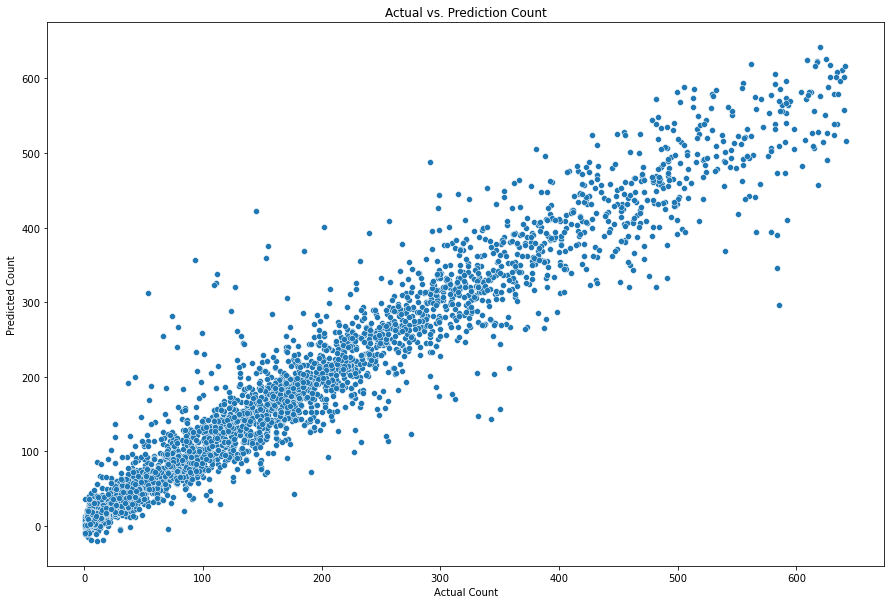

In [54]:
plt.figure(figsize=(15, 10))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Count', 
                                               xlabel='Actual Count', 
                                               ylabel='Predicted Count');

### Feature Importance 

In [55]:
transformer.get_feature_names()

['One Hot__x0_2',
 'One Hot__x0_3',
 'One Hot__x0_4',
 'One Hot__x1_2',
 'One Hot__x1_3',
 'One Hot__x1_4',
 'One Hot__x2_1',
 'Binary__Day Name',
 'Humidity',
 'Temperature',
 'Hour',
 'Month',
 'Year']

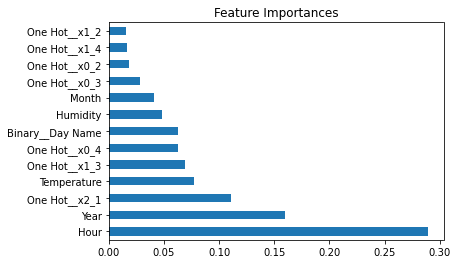

In [56]:
# Plot feature importances
feature_imp = pd.Series(xgbTuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

## Kesimpulan

Dari hasil pemodelan yang telah dilakukan, dapat disimpulkan bahwa fitur yang paling berpengaruh terhadap jumlah penyewaan sepeda ('Count') adalah 'Hour'. Evaluasi model menggunakan tiga matriks, yaitu RMSE, MAE, dan MAPE. Setelah dilakukan hyperparameter tuning, didapatkan nilai RMSE sebesar 39,12. Oleh karena itu, dapat disimpulkan bahwa model dapat memperkirakan jumlah penyewa sepeda dengan meleset sekitar 39 orang dari jumlah aktualnya jika digunakan untuk memperkirakan jumlah penyewaan pada rentang nilai maksimum sebesar 645. Meskipun demikian, masih terdapat bias pada data prediksi dan aktual karena fitur pada dataset masih kurang untuk merepresentasikan keadaan dimana orang akan memutuskan untuk menyewa sepeda, seperti lokasi stasiun, adanya event tertentu, dan lain-lain.

## Rekomendasi dan Saran

Berikut merupakan beberapa poin yang dapat dilakukan untuk pengembangan model yang lebih baik:

   1. Mengumpulkan lebih banyak data dapat membantu meningkatkan model, terutama jika data yang dikumpulkan lebih dari dua tahun. Dengan menggunakan data ini, keterkaitan tahun dengan Count dapat dipelajari lebih detail. Selain itu, model yang lebih kompleks dapat digunakan untuk pemodelan untuk membandingkan dan menemukan model dengan kesalahan paling kecil.
    
   2. Penambahan fitur baru seperti fitur "Hour" yang merupakan fitur paling berpengaruh terhadap "Count". Selain itu, penambahan fitur baru seperti lokasi station dan faktor-faktor lain yang mempengaruhi keputusan orang untuk menyewa sepeda dapat meningkatkan akurasi prediksi.

   3. Selain itu, model yang telah dibangun dapat digunakan untuk pengembangan lain, seperti pembuatan model untuk memprediksi harga rental atau jumlah sepeda yang masuk atau keluar dari stasiun tertentu. Analisis lokasi stasiun strategis dapat membantu dalam membuat pertimbangan untuk membuka stasiun baru di lokasi serupa.



## Save Model

In [58]:
# Save model

# import pickle
# finalModel = randomXGB.best_estimator_.fit(X_train, y_train)
# pickle.dump(finalModel, open('ModelXGBBikeSharing.sav', 'wb'))

In [59]:
# Load model

# filename = 'ModelXGBBikeSharing.sav'
# loaded_model = pickle.load(open(filename, 'rb'))

In [60]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

39.12877918888594